# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Загрука и предобработка данных на обучающей выборке

Датасет https://www.kaggle.com/c/titanic/data

## Визуальная оценка данных

In [2]:
# загрузка
df_train = pd.read_csv('train.csv')

# отображение
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# кол-во данных в датасете
len(df_train)

891

Удалим сразу признаки, которые не влияют на целевую величину (survived) исходя из здравого смысла, так как эти признаки не являются информативными, а просто будут занимать вычислительную мощность

PassengerId - простая нумерация - идентификатор пассажира, она есть в pandas датафрейме, можно удалить.

Name - имя пасажира, так же просто идентификатор, можно удалить.

Ticket - номер билета, уникальный для каждого пассажира, можно удалить, так как информация о кабинах и о классах у нас имеется.

In [4]:
# удаление неинформативных признаков
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Исследуем датасет на наличие пропусков и почистим данные от них

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


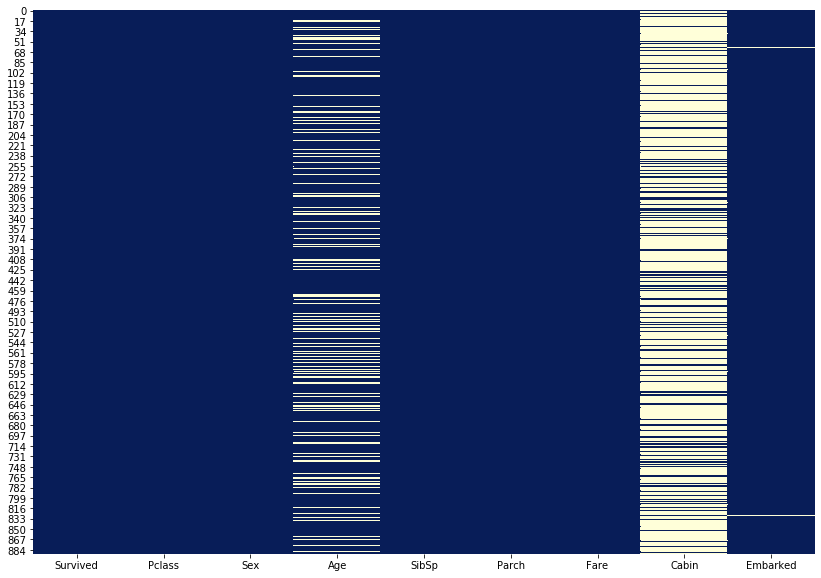

In [6]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

В признаке Cabin очень много пропусков (всего 204 из 891 значения заполнены), заполнять эти данные искусственно будет некорректно, поэтому удалим этот признак

In [7]:
df_train = df_train.drop(['Cabin'], axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


В признаке Age 177 пропусков, это достаточно много, учитвая, что всего в датасете 891 запись, но можно поробовать просто удалить строки с null значением, в случае недостатка данных, воспользуемся аугментацией (oversampling ADASYN) в дальнейшем. 

В признаке Embarked 2 пропуска, просто удалим строки с пропусками.

In [9]:
df_train = df_train.dropna()
len(df_train)

712

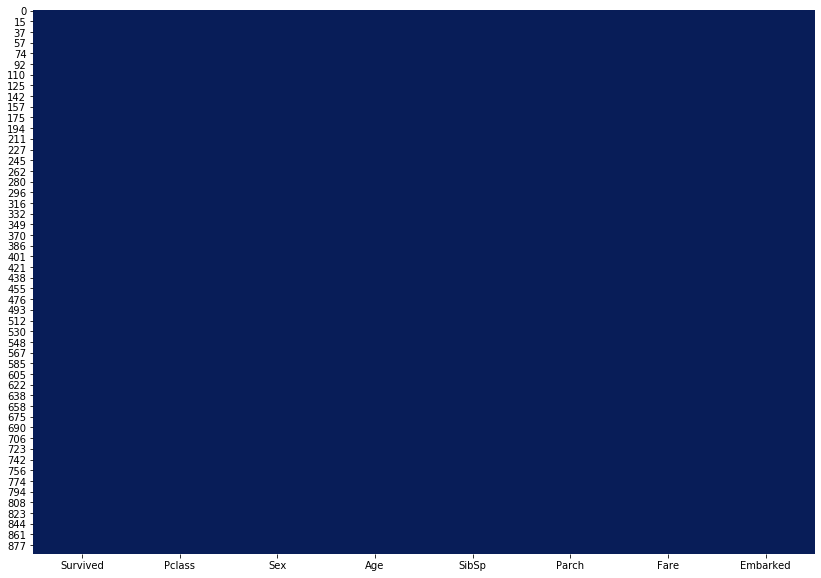

In [10]:
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_train.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

Видно, что пропусков в данных не осталось

## Посмотрим основные статистики по количественным признакам

In [11]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Есть подозрения, что в данных есть выбросы, построим графики

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000005BEE3DD808>,
      dtype=object)

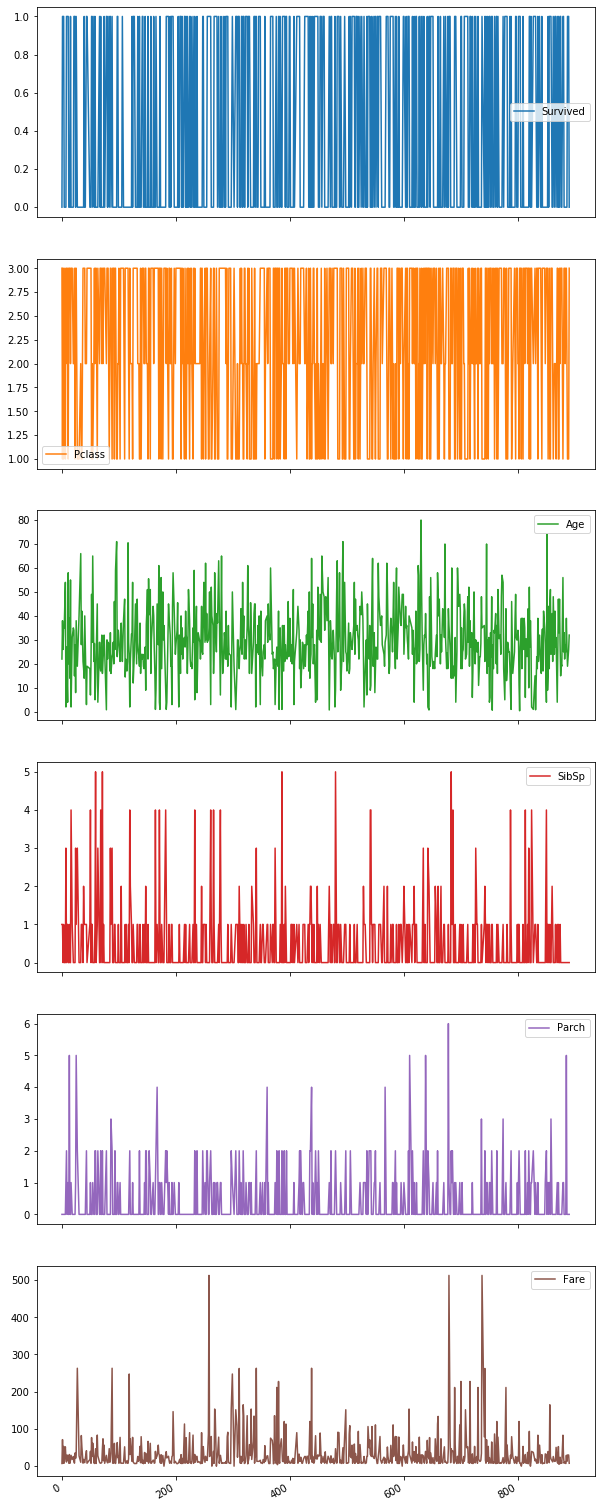

In [12]:
df_train.plot(subplots=True, figsize=(10, 30))

В принципе, ничего критичного нет, перед обучением центрируем и нормируем (нормализуем) наши данные, тогда влкад выбросов в процесс обучения будет не такой большой.

## Посмтрим на типы данных датасета

In [13]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [14]:
df_train.dtypes[df_train.dtypes == object]

Sex         object
Embarked    object
dtype: object

В данных есть категорилиальные признаки, их нужно перекодировать. Воспользуемся Label encoder.

In [15]:
from sklearn import preprocessing

# функция кодировки 
def number_encode_features(init_df):
    result = init_df.copy() 
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders


encoded_data_train, encoders_train = number_encode_features(df_train)
encoded_data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Проверим балансировку целевой величины

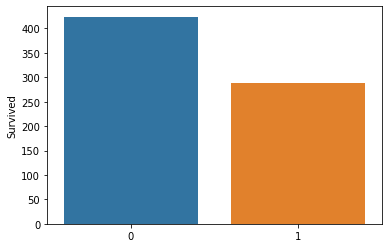

In [16]:
balance = df_train.groupby('Survived')['Survived'].count()

sns.barplot(x = [0, 1], y = balance)

Данные хорошо сбалансированы, но можно будет попробовать настроить веса градиентого спуска некоторых алгоритмов

## Построим гистограммы распределния всех признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000005BEE27A148>,
      dtype=object)

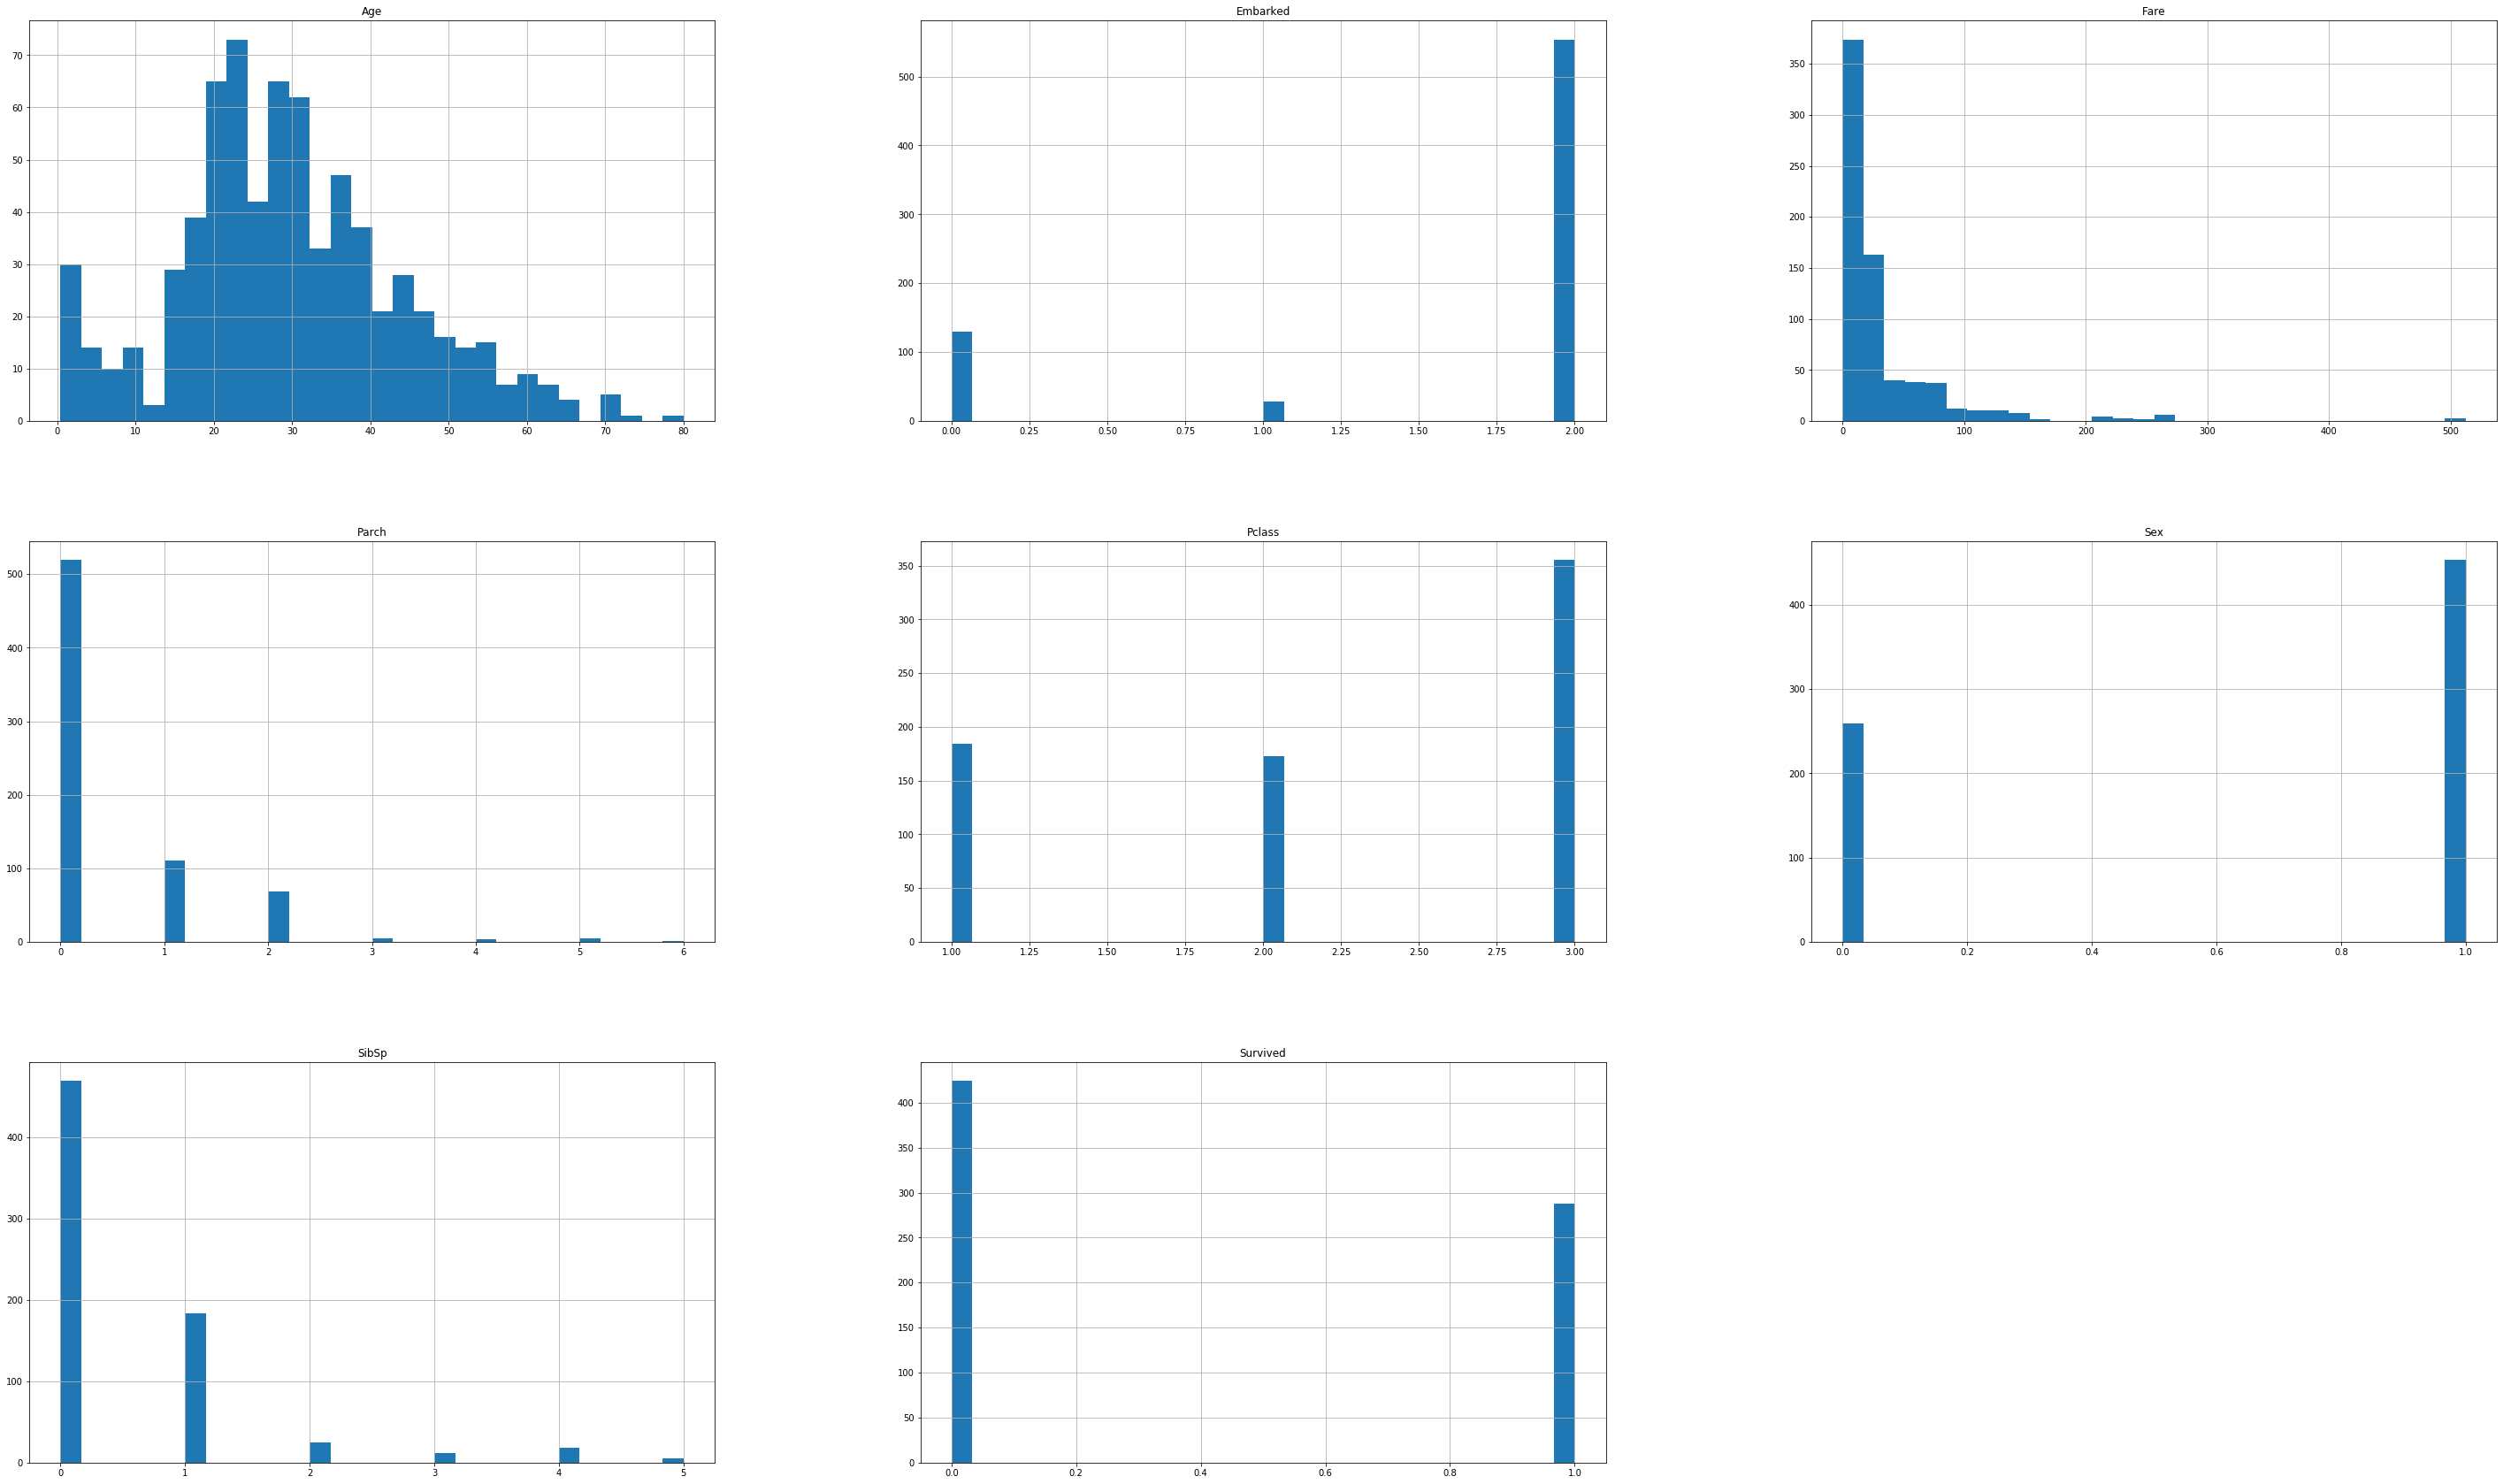

In [17]:
%matplotlib inline
encoded_data_train.hist(bins=30,figsize=(50,30))

## Построим матрицу корреляций

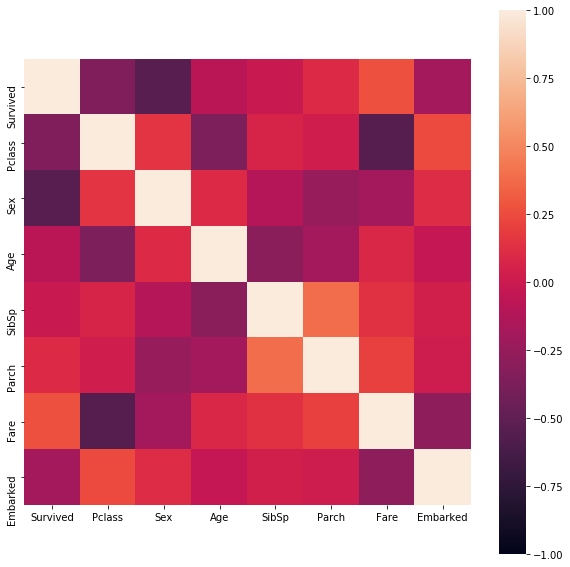

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data_train.corr(), vmin=-1, square=True)
plt.show()

Данных 1 или -1 линейной зависимостью нет

## Разделим данные и целевую величину

In [19]:
y_train = np.array(encoded_data_train['Survived']) # ответы
y_train

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [20]:
encoded_data_train = encoded_data_train.drop(['Survived'], axis= 1)
print('Ответы на обучающей выборке\n', y_train)
print('Обучающая выборка')
encoded_data_train.head()

Ответы на обучающей выборке
 [0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [21]:
# преобразуем оубчающую выборку в np.array
X_train = np.array(encoded_data_train, float)
X_train

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ...,  0.    , 30.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

## Нормализуем данные

Данные на тесте необходимо будет предобработать в том же формате, что и на трейне, поэтому сохраним среднее и стандартное отклонение в отдельные переменные

In [22]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean)/std
X_train

array([[ 0.90859974,  0.75613751, -0.52766856, ..., -0.50678737,
        -0.51637992,  0.51958818],
       [-1.48298257, -1.32251077,  0.57709388, ..., -0.50678737,
         0.69404605, -2.04948671],
       [ 0.90859974, -1.32251077, -0.25147795, ..., -0.50678737,
        -0.50362035,  0.51958818],
       ...,
       [-1.48298257, -1.32251077, -0.73481151, ..., -0.50678737,
        -0.08633507,  0.51958818],
       [-1.48298257,  0.75613751, -0.25147795, ..., -0.50678737,
        -0.08633507, -2.04948671],
       [ 0.90859974,  0.75613751,  0.16280796, ..., -0.50678737,
        -0.50692839, -0.76494927]])

Теперь на этих данных можно обучать алгоритмы

# Загрузка и предобработка тестовых данных

Тестовые данные должны быть предобработаны в том же формате, что и обучающая выборка, поэтому напишем функцию предобработки

In [23]:
# функция предобработки тестовых данных

def test_preprocessing(df, mean, std, encoders):
    df = df.drop(['PassengerId', 'Name', 'Ticket','Cabin'], axis = 1) # удаление неинформативных признаков
    #df = df.dropna() # очистка от пропусков
    df = df.fillna(method='pad') # заполнение пропусков предыдущим значением
    
    # кодировка категориальных признаков c тем же кодировщиком
    result = df.copy()
    for column in result.columns:
        if result.dtypes[column] == np.object:
            result[column] = encoders[column].fit_transform(result[column])
    
    X = np.array(result, float) # выборка
    X = (X - mean)/std # нормализация
    return X

In [24]:
# загрузка
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
# предобработка 

X_test = test_preprocessing(df_test, mean, std, encoders_train)

print('Нормализованная тесотвая выборка\n', X_test)

Нормализованная тесотвая выборка
 [[ 0.90859974  0.75613751  0.33542709 ... -0.50678737 -0.50543127
  -0.76494927]
 [ 0.90859974 -1.32251077  1.19852274 ... -0.50678737 -0.52110569
   0.51958818]
 [-0.28719141  0.75613751  2.23423752 ... -0.50678737 -0.47030369
  -0.76494927]
 ...
 [ 0.90859974  0.75613751  0.6116177  ... -0.50678737 -0.51637992
   0.51958818]
 [ 0.90859974  0.75613751  0.6116177  ... -0.50678737 -0.50125747
   0.51958818]
 [ 0.90859974  0.75613751  0.6116177  ...  0.66474707 -0.23078667
  -2.04948671]]


# Обучение алгоритмов

Построим несколько моделей алгоритмов, проведём тюнинг моделей с помощью кросс-валидации на тестовой выборке, посмотрим на метрики качества, выберем лучшие парметры и лучшие алгоритмы

## KNN

In [26]:
# функция отрисовки для grid search

def grid_plot(x, y, x_label, title, y_label='accuracy'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [27]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')}

gs = GridSearchCV(knn, grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

{'n_neighbors': 12} 0.806155816014971


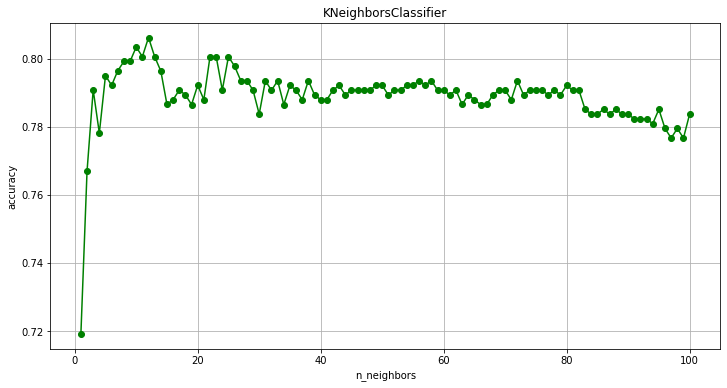

In [28]:
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Лучший параметр для алгоритма KNN - n_neighbors =  12, метрика accuracy = 0.806155816014971

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression()

grid = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.array(np.logspace(-3, 2, num = 10), dtype='float'),
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 0.01291549665014884, 'penalty': 'l2'} 0.7907219541022358


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


Лучший параметр для алгоритма LogisticRegression - C = 0.01291549665014884 - обратный коэф ругляризации, штраф = l2,  метрика accuracy = 0.7907219541022358

Алгоритм LogReg справился немного хуже, чем KNN

## SVM

In [30]:
from sklearn.svm import SVC

alg = SVC()

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 185 out of 200 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


({'C': 1.666666666666667, 'kernel': 'rbf'}, 0.8174234216487738)

Лучший параметр для алгоритма Support Vector Machine - C = 1.666666666666667 - обратный коэф ругляризации, ядро = rbf,  метрика accuracy = 0.8174234216487738

Алгоритм SVM справился лучше, чем KNN, возмём его за эталон

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

alg = DecisionTreeClassifier()

grid = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


({'criterion': 'entropy', 'splitter': 'best'}, 0.7683049345021176)

Метрика accuracy алгоритма Decision Tree хуже, поэтому его рассматривать не будем

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

alg = RandomForestClassifier()

grid = {'criterion': ['gini', 'entropy']
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


({'criterion': 'gini'}, 0.7992120555500837)

 Random Forest справился хуже, чем SVM, но всё же его стоит опробовать не тесте, так как сам алгоритм очень хорош

## Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

alg = GradientBoostingClassifier()

grid = {'loss': ['deviance', 'exponential'],
        'criterion': ['friedman_mse', 'mse','mae']
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished


({'criterion': 'friedman_mse', 'loss': 'deviance'}, 0.8202600216684723)

Градиентный бустинг дал самый лучший результат на кросс валидации

# Пробуем на тестовой выборке

## Gradient Boosting

In [34]:
# инициализация модели

gb = GradientBoostingClassifier(criterion= 'friedman_mse', loss= 'deviance' )

# обучение
gb.fit(X_train, y_train)

# предсказания
preds = gb.predict(X_test)

In [35]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [36]:
preds_frame = pd.DataFrame({'PassengerId':[i for i in range(892,1310)],
                             'Survived': preds})

preds_frame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [37]:
# преобразуем в csv
preds_frame.to_csv(path_or_buf='preds_gb.csv',index=False)

In [38]:
pd.read_csv('preds_gb.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Оценка на kaggle вышла 0.75837, что немного странно, так как при кросс валидации результат был сильно лучше, возможно, модель переобучилась

## SVM

In [39]:
# инициализация модели

svm = SVC(C= 1.666666666666667, kernel= 'rbf' )

# обучение
svm.fit(X_train, y_train)

# предсказания
preds = svm.predict(X_test)

In [40]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [41]:
preds_frame = pd.DataFrame({'PassengerId':[i for i in range(892,1310)],
                             'Survived': preds})

preds_frame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [42]:
# преобразуем в csv
preds_frame.to_csv(path_or_buf='preds_svm.csv',index=False)

In [43]:
pd.read_csv('preds_svm.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


На kaggle оценка вышла 0.77272

## Random Forest

In [44]:
#инициализация модели

rf = RandomForestClassifier(criterion =  'gini')

# обучение
rf.fit(X_train, y_train)

# предсказания
preds = rf.predict(X_test)

In [45]:
preds

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [46]:
preds_frame = pd.DataFrame({'PassengerId':[i for i in range(892,1310)],
                             'Survived': preds})

preds_frame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [47]:
preds_frame.to_csv(path_or_buf='preds_rf.csv',index=False)

In [48]:
pd.read_csv('preds_rf.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


На kaggle оценка вышла 0.73444, сильно меньше, чем у SVM

## KNN

Попробуем самую простую модель ради интереса

In [49]:
#инициализация модели

knn = KNeighborsClassifier(n_neighbors= 12)

# обучение
knn.fit(X_train, y_train)

# предсказания
preds = knn.predict(X_test)

In [50]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [51]:
preds_frame = pd.DataFrame({'PassengerId':[i for i in range(892,1310)],
                             'Survived': preds})

preds_frame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [52]:
preds_frame.to_csv(path_or_buf='preds_knn.csv',index=False)

In [53]:
pd.read_csv('preds_knn.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Оценка на kaggle вышла 0.75358, даже лучше, чем у Random Forest

# Вывод

Преобработав данные и обучив на них несколько алгоритмов, я получил наилучшую оценку на тесте алгоритмом SVM.

Эту оценку тоже можно улучшить, использовав например ван-хот кодирование, а не label encoder, можно провести аугментацию (oversampling и undersampling), чтобы получить лучшую границу  (лучше обучить алгоритмы). В дальнейшем я этим займусь.

При кросс-валидации на обучающей выборке лучим был алгоритм Gradient Boosting, но на тесте он дал сильно отличающиеся результаты, скорее всего модель переобучилась на обучающей выборке, с этим тоже можно попробовать бороться.

Так же в дальнейшем можно попробовать простейшие нейросети для классификации, они должны дать лучший результат, этим я тоже планирую заняться в ближайшее время